<a href="https://colab.research.google.com/github/eugeniaring/machine-learning-course-eugenia/blob/main/lezione_5_bagging_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset link: https://www.kaggle.com/c/bike-sharing-demand

Github link del dataset: https://github.com/eugeniaring/machine-learning-course-eugenia/tree/main/data

In [ ]:
df_train = pd.read_csv('train (1).csv')
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df_train.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
df_train.season.head()

0    1
1    1
2    1
3    1
4    1
Name: season, dtype: int64

In [ ]:
# (1:winter, 2:spring, 3:summer, 4:fall)
diz = {1:'winter',2:'spring',3:'summer',4:'fall'}
df_train['season_s'] = df_train['season'].map(lambda r: diz[r])

In [ ]:
df_train[['season','season_s']].head()

,season,season_s
0,1,winter
1,1,winter
2,1,winter
3,1,winter
4,1,winter


In [ ]:
df_train.groupby(by='season_s').agg({'count':'mean','temp':'mean'}).reset_index().sort_values(by='temp')

,season_s,count,temp
3,winter,116.343261,12.530491
0,fall,198.988296,16.649239
1,spring,215.251372,22.823483
2,summer,234.417124,28.789111


In [ ]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'season_s'],
      dtype='object')

In [ ]:
df_train[['casual','registered','count']].corr()

,casual,registered,count
casual,1.000000,0.497250,0.690414
registered,0.497250,1.000000,0.970948
count,0.690414,0.970948,1.000000


In [ ]:
import seaborn as sns

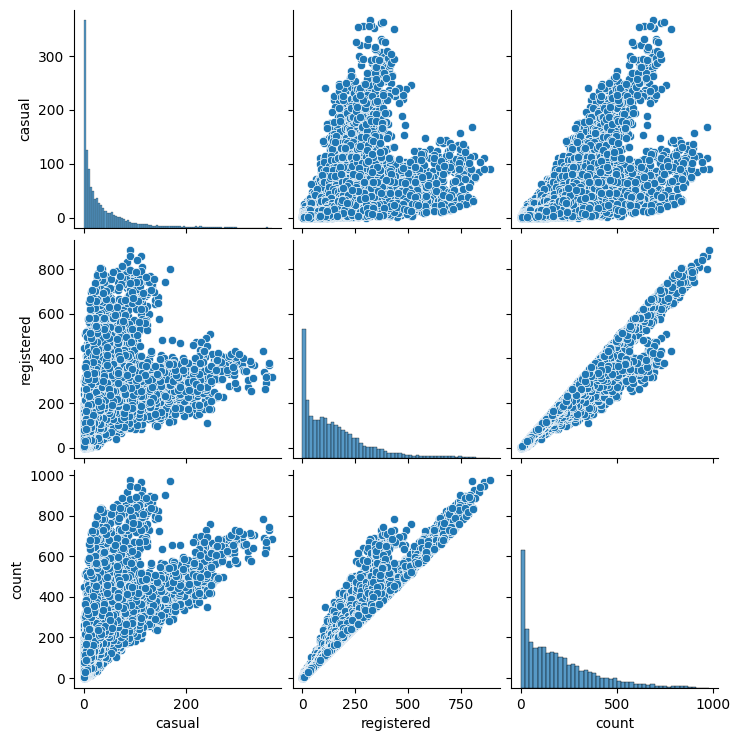

In [ ]:
sns.pairplot(df_train[['casual','registered','count']])
plt.show()

In [ ]:
df_train.drop(['casual','registered'],axis=1,inplace=True)

In [ ]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_s
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,winter
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,winter
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,winter
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,winter
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,winter


In [ ]:
df_train[['temp','atemp','humidity','windspeed']].corr()

,temp,atemp,humidity,windspeed
temp,1.000000,0.984948,-0.064949,-0.017852
atemp,0.984948,1.000000,-0.043536,-0.057473
humidity,-0.064949,-0.043536,1.000000,-0.318607
windspeed,-0.017852,-0.057473,-0.318607,1.000000


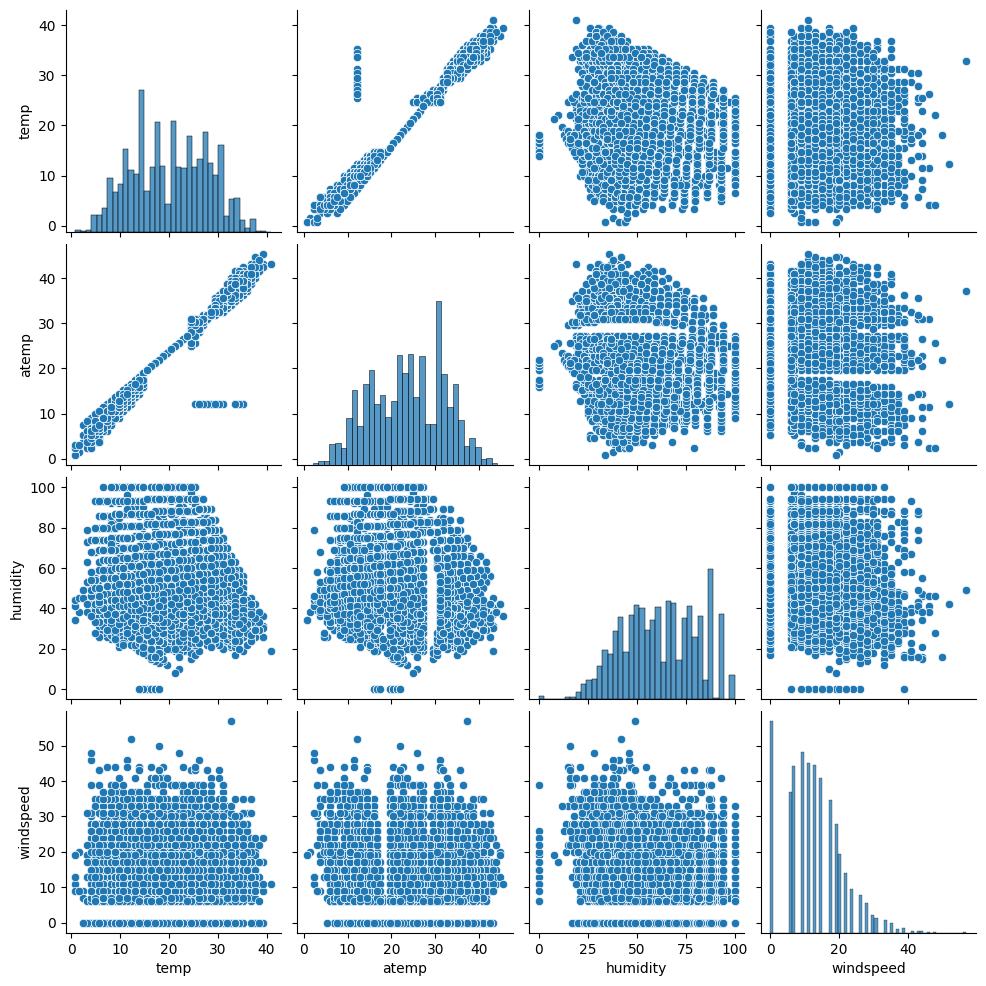

In [ ]:
sns.pairplot(df_train[['temp','atemp','humidity','windspeed']])
plt.show()

In [ ]:
df_test = pd.read_csv('test (1).csv')
#df_test.drop(['casual','registered'],axis=1,inplace=True)
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split

X =  df_train.drop(['count','atemp','datetime','season_s'],axis=1)
y = df_train['count']

In [ ]:
len(X)

10886

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

In [ ]:
print(mean_squared_error(y_pred_train_lr,y_train))
print(mean_squared_error(y_pred_test_lr,y_test))
print(abs(mean_squared_error(y_pred_test_lr,y_test)-mean_squared_error(y_pred_train_lr,y_train)))

24128.853326906792
25094.724003420277
965.8706765134848


In [ ]:
dt = DecisionTreeRegressor(random_state=43)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=43)

In [ ]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

In [ ]:
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))

2761.2334528184265
39662.30572747679


In [ ]:
rf = RandomForestRegressor(random_state=43,n_estimators=500,min_samples_split=30,max_features=5)
rf.fit(X_train,y_train)

RandomForestRegressor(max_features=5, min_samples_split=30, n_estimators=500,
                      random_state=43)

In [ ]:
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

In [ ]:
print(mean_squared_error(y_pred_train_rf,y_train))
print(mean_squared_error(y_pred_test_rf,y_test))
print(abs(mean_squared_error(y_pred_test_rf,y_test)-mean_squared_error(y_pred_train_rf,y_train)))

16317.196848572989
21307.35342400164
4990.156575428653


In [ ]:
gb = GradientBoostingRegressor(random_state=43,n_estimators=500,loss='absolute_error',min_samples_split=30)
gb.fit(X_train,y_train)

GradientBoostingRegressor(loss='absolute_error', min_samples_split=30,
                          n_estimators=500, random_state=43)

In [ ]:
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb = gb.predict(X_test)

In [ ]:
print(mean_squared_error(y_pred_train_gb,y_train))
print(mean_squared_error(y_pred_test_gb,y_test))
print(abs(mean_squared_error(y_pred_train_gb,y_train)-mean_squared_error(y_pred_test_gb,y_test)))

22784.778680159605
23984.238566254306
1199.4598860947008
